# `nphase_border`
Computes the number of phases that border on each pixel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()

## `im`
This function works on both 2D and 3D images.  If an im

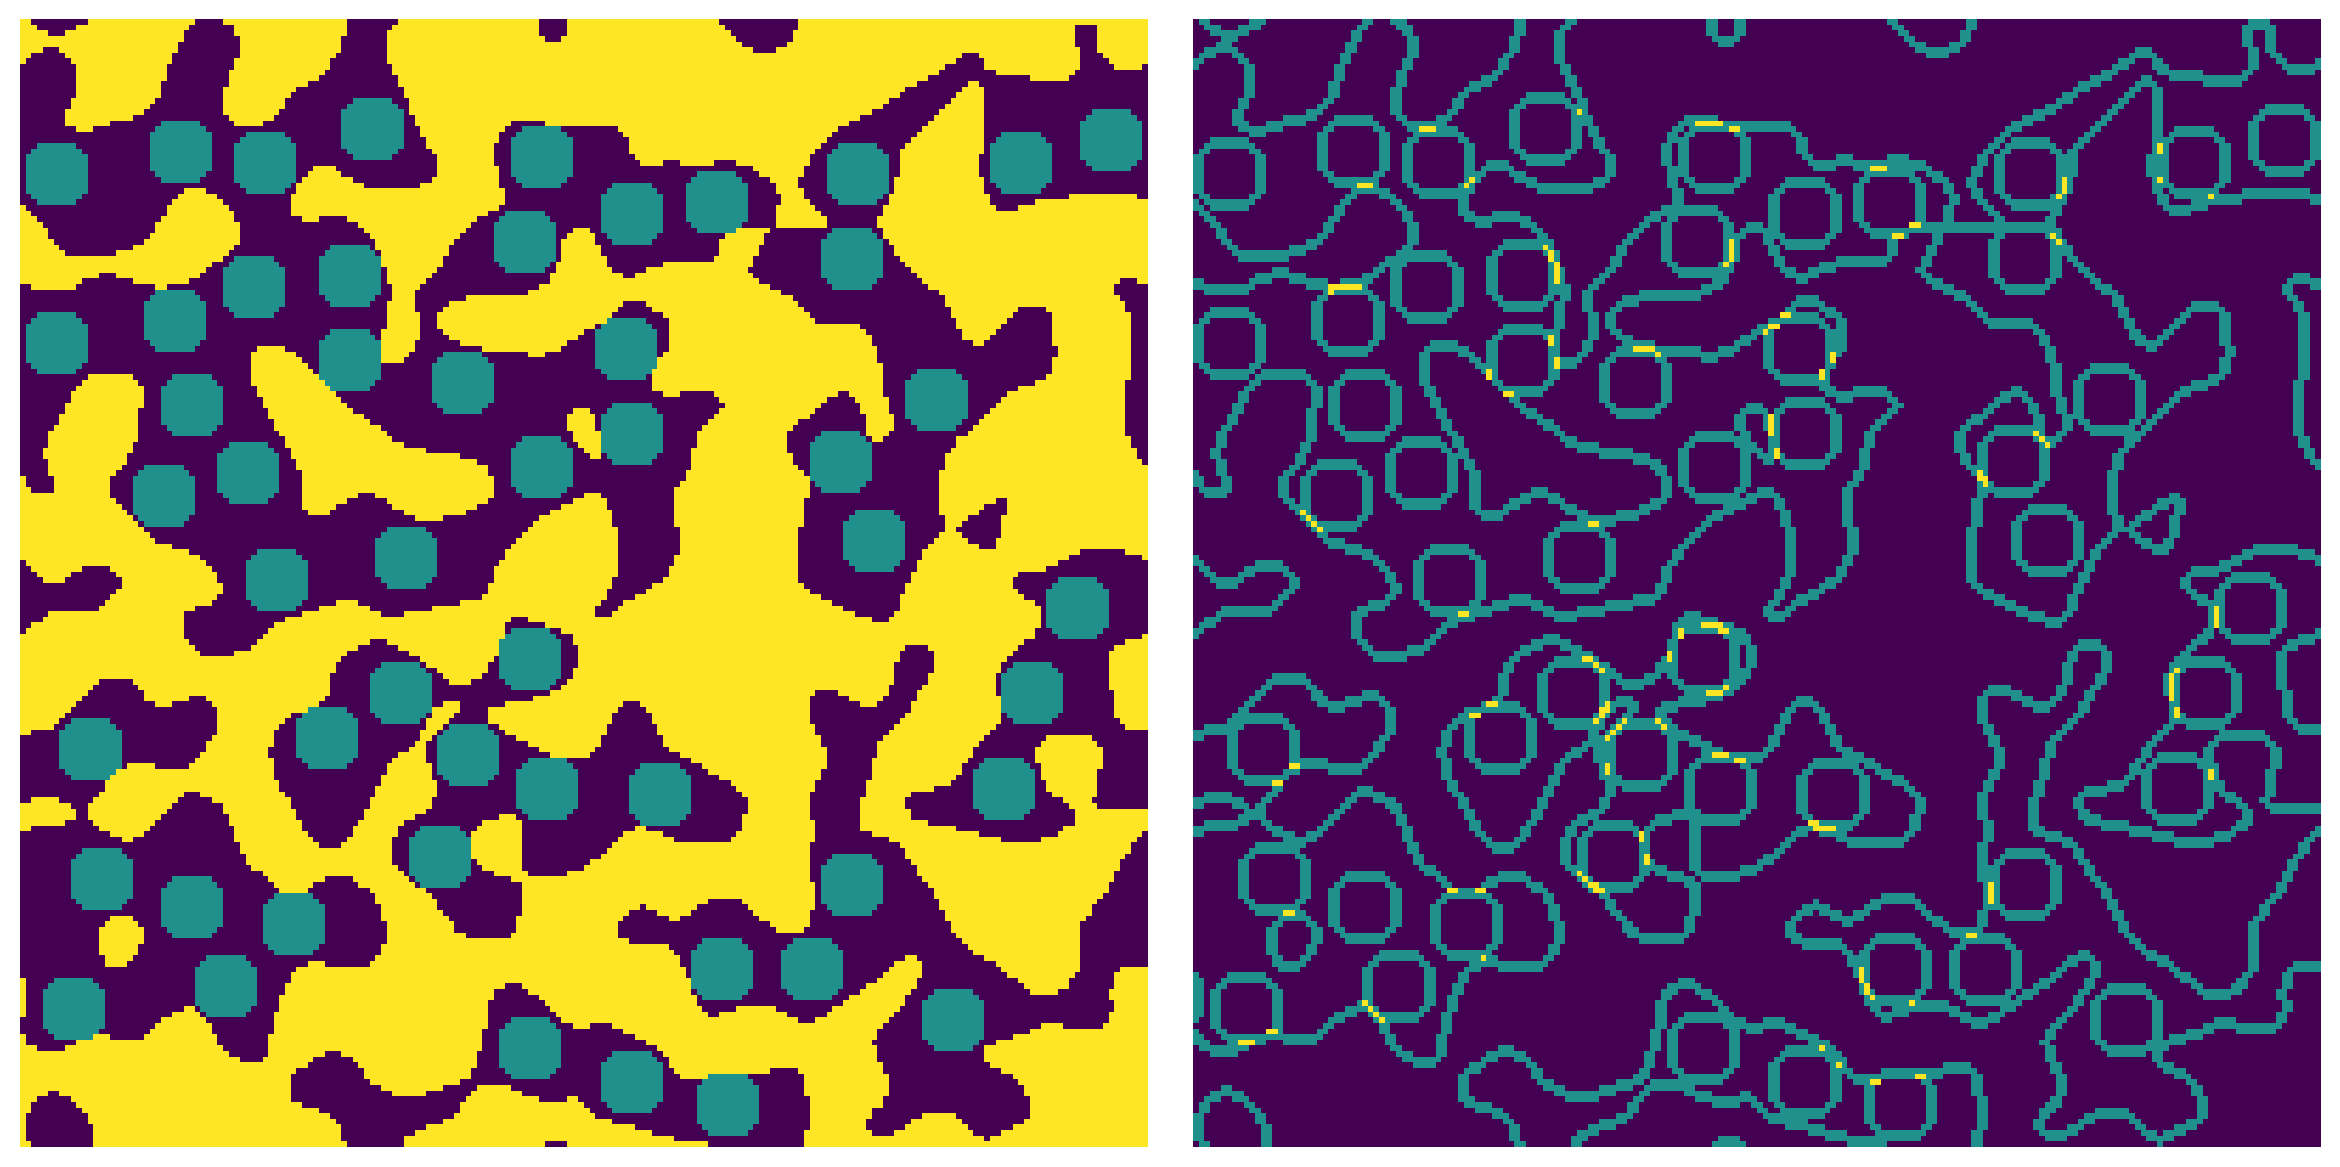

In [2]:
matrix = ps.generators.blobs([200, 200])
inclusions = ps.generators.random_spheres(im=matrix, r=5, clearance=3)
bd = ps.filters.nphase_border(matrix * 1.0 + inclusions * 1.0)

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(matrix * 1.0 + inclusions * 1.0, origin="lower", interpolation="none")
ax[0].axis(False)
ax[1].imshow(bd, origin="lower", interpolation="none")
ax[1].axis(False);

In [3]:
np.unique(bd)

array([1., 2., 3.])

The unique values in ``bd`` are 1, 2 and 3 indicating that some pixels border on 1 phase (internal pixels), 2 phases (edges) or 3 phases (corners where void, matrix and inclusion meet). Including diagonals results in a thicker border since more voxels are found that lie on an edge.

## `conn`
Controls how 'connected' a group of voxels must be.  The options are `'min'` which means voxels are only considered connected if they share a face, and `'max'` which means voxels are connected if they share a face, edge or corner. 

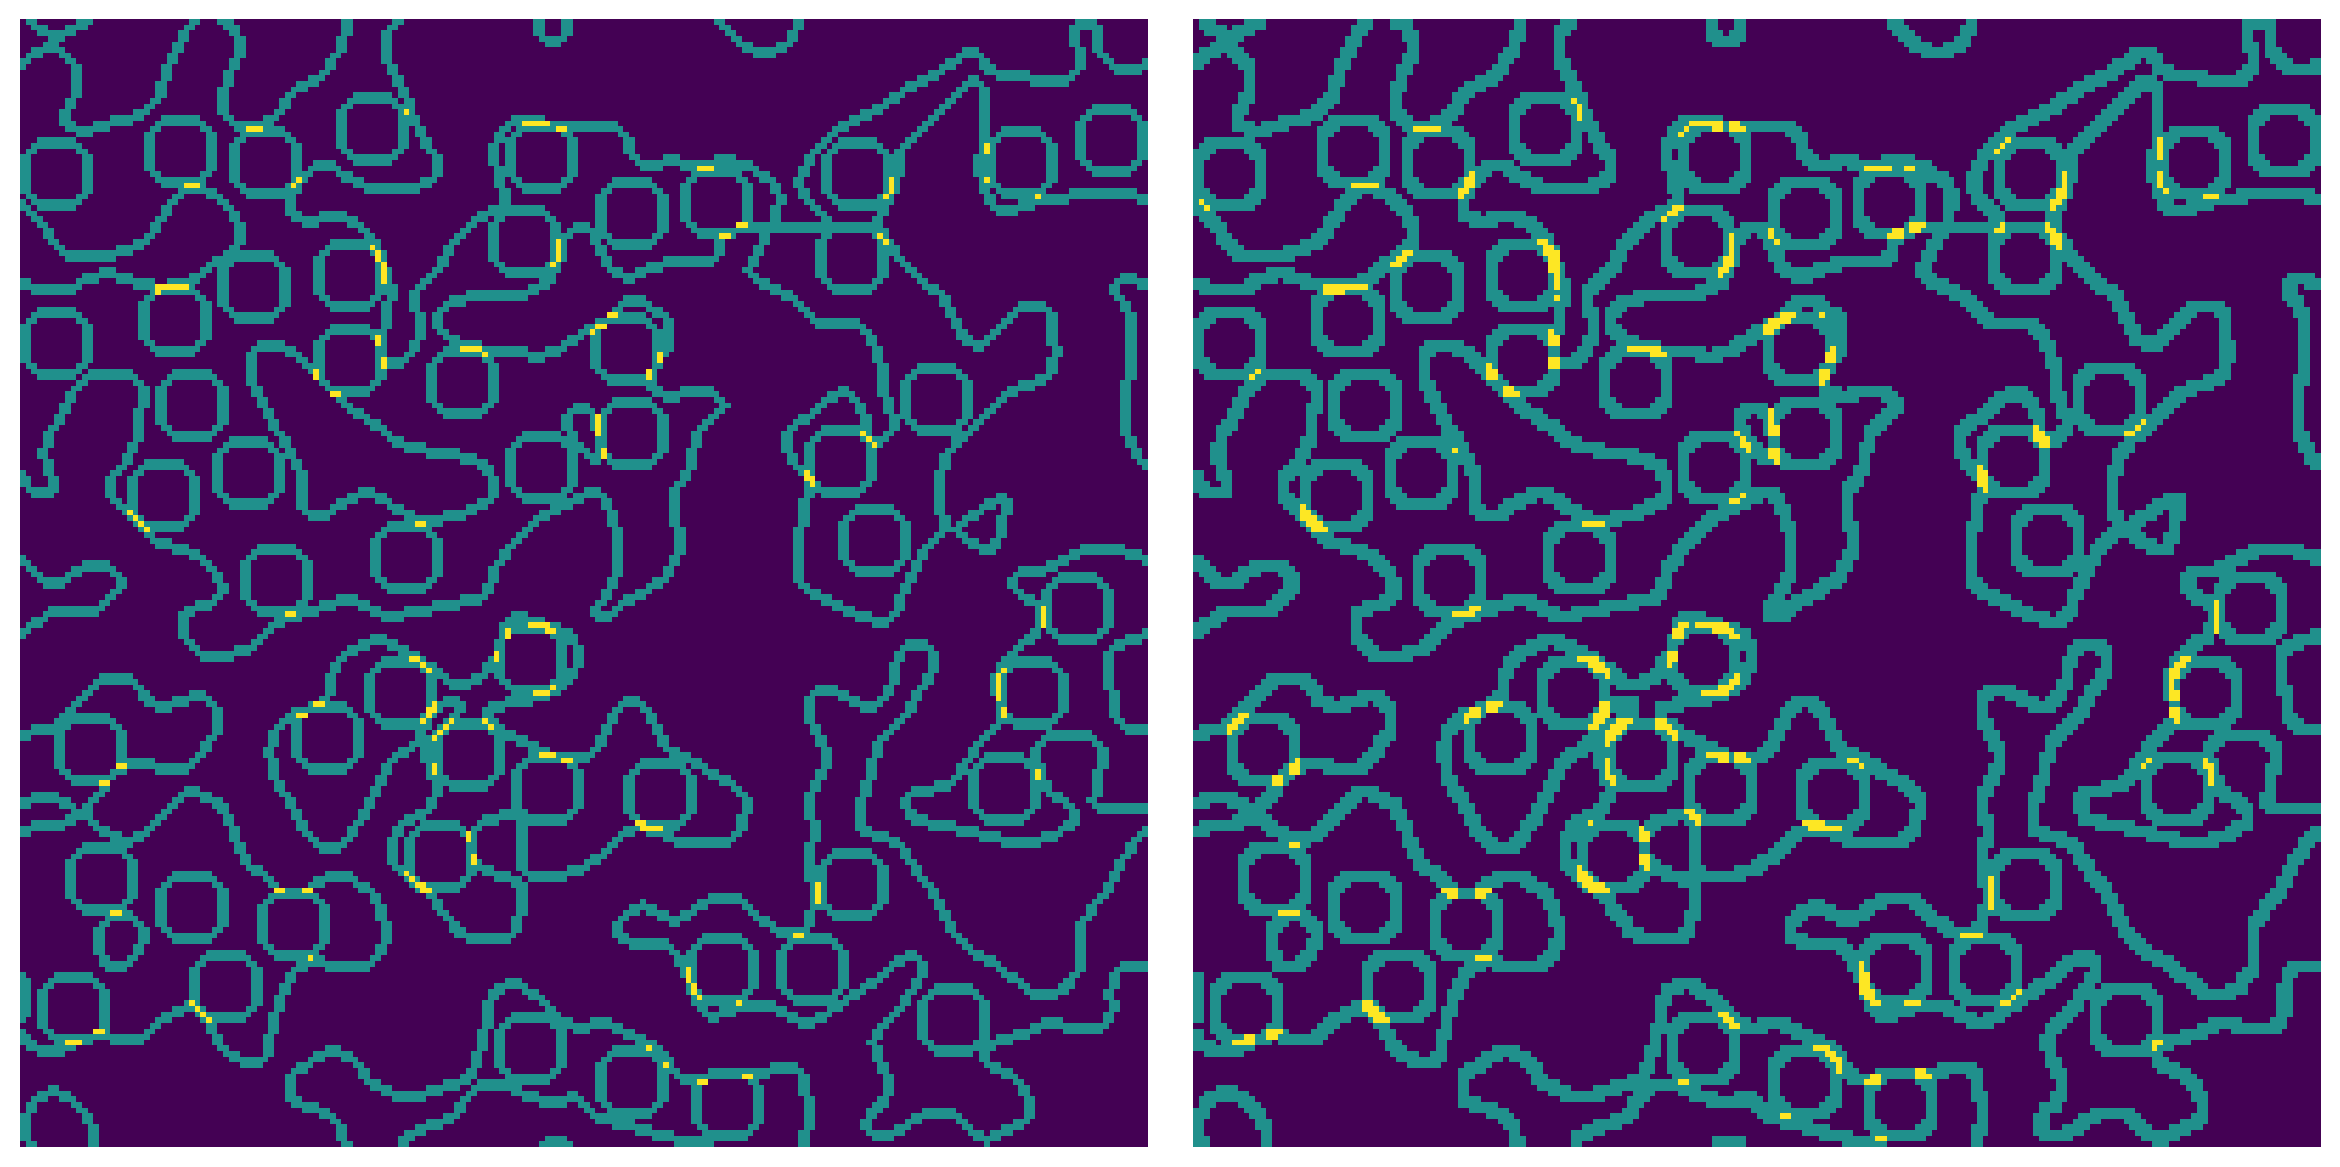

In [4]:
bd1 = ps.filters.nphase_border(matrix * 1.0 + inclusions * 1.0, conn="min")
bd2 = ps.filters.nphase_border(matrix * 1.0 + inclusions * 1.0, conn="max")

fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(bd1, origin="lower", interpolation="none")
ax[0].axis(False)
ax[1].imshow(bd2, origin="lower", interpolation="none")
ax[1].axis(False);